<a href="https://colab.research.google.com/github/SophieShin/DeepLearning/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup
import tensorflow.keras as keras

In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
# load data 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


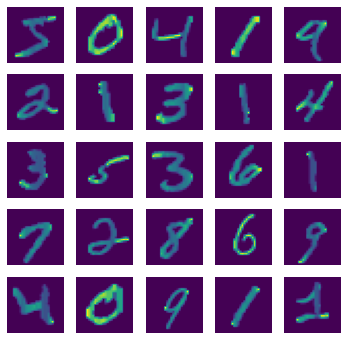

In [30]:
# let's look at the data 

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

for index in range(25):
  plt.subplot(5, 5, index+1)
  plt.imshow(x_train[index])
  plt.axis('off')

plt.show()

In [4]:
# check input data
# 28 * 28 size, hand-written digits 0-9
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [10]:
# chech the size of target
# number 0 ~ 9(10 numbers in total)
print(y_train[0])

5


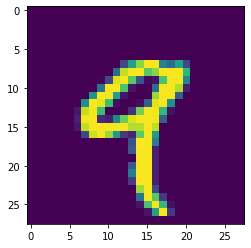

In [11]:
# check what number the fifth train data is

import matplotlib.pyplot as plt

plt.imshow(x_train[4])
plt.show()

In [9]:
# verify that the number was 9

print(y_train[4])

9


In [12]:
# how many data we've got?

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

60000 train samples
10000 test samples


In [13]:
# normalize data to have 0 mean and 1 standard deviation

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

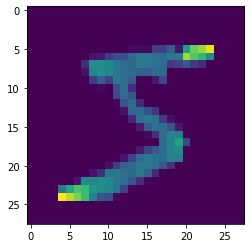

In [ ]:
print(x_train[0])

plt.imshow(x_train[0])
plt.show()

In [14]:
# build the model
model = tf.keras.models.Sequential()

In [15]:
# input layer
# vectorize 2D image(28*28) to a vector with 784 elements
model.add(tf.keras.layers.Flatten())

In [16]:
# add hidden layer with 128 units(nodes/neurons)
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

In [17]:
# add another hidden layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

In [18]:
# output layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# outputs should be classified o to 9(probability), so use softmax instead of relu

In [19]:
# use adam as regularizer
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', # target is expressed as number 0 to 9, if done one-hot encoding, then use 'categorical_crossentropy' instead.
              metrics = ['accuracy'])

In [40]:
# train the model
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0309 - accuracy: 0.9894
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0243 - accuracy: 0.9920
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207 - accuracy: 0.9928
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0170 - accuracy: 0.9941
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0150 - accuracy: 0.9946


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 784)                 0         
_________________________________________________________________
dense (Dense)                (32, 128)                 100480    
_________________________________________________________________
dense_1 (Dense)              (32, 128)                 16512     
_________________________________________________________________
dense_2 (Dense)              (32, 10)                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [41]:
# evaluate the model

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1095 - accuracy: 0.9743
0.10949251800775528
0.9743000268936157


In [37]:
# test
predictions = model.predict(x_test)

In [25]:
print(predictions)

[[2.5065980e-10 5.4696039e-09 9.9811153e-08 ... 9.9999583e-01
  1.2821475e-08 3.0560449e-07]
 [6.3741311e-11 3.2122100e-06 9.9999666e-01 ... 9.5571231e-11
  8.9030978e-09 1.5703833e-14]
 [1.3043899e-09 9.9995863e-01 2.1735408e-07 ... 1.7989962e-05
  3.6697711e-06 1.6275568e-08]
 ...
 [8.2868185e-11 1.0161587e-07 2.4793141e-11 ... 1.8107597e-05
  9.3365600e-08 6.3869995e-03]
 [6.8257013e-09 1.5061763e-11 4.6451562e-12 ... 2.5397927e-08
  1.7989549e-05 1.3982255e-09]
 [1.9159503e-07 7.0573930e-10 5.1411780e-10 ... 1.7895272e-11
  4.7427502e-09 8.9325164e-10]]


In [26]:
# check what number the model predicts with the first data
import numpy as np

print(np.argmax(predictions[0]))

7


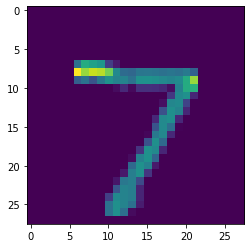

In [27]:
# let's see what number it is with a picture
plt.imshow(x_test[0])
plt.show()

In [28]:
# save the model for the future purposes

model.save('mnist.model')

INFO:tensorflow:Assets written to: mnist.model/assets


In [29]:
# load the saved model and we are good to go to predict with new data!

new_model = tf.keras.models.load_model('mnist.model')